Global best position: [-1.29667839 -0.77370495], Global best score: -6.550567564248235


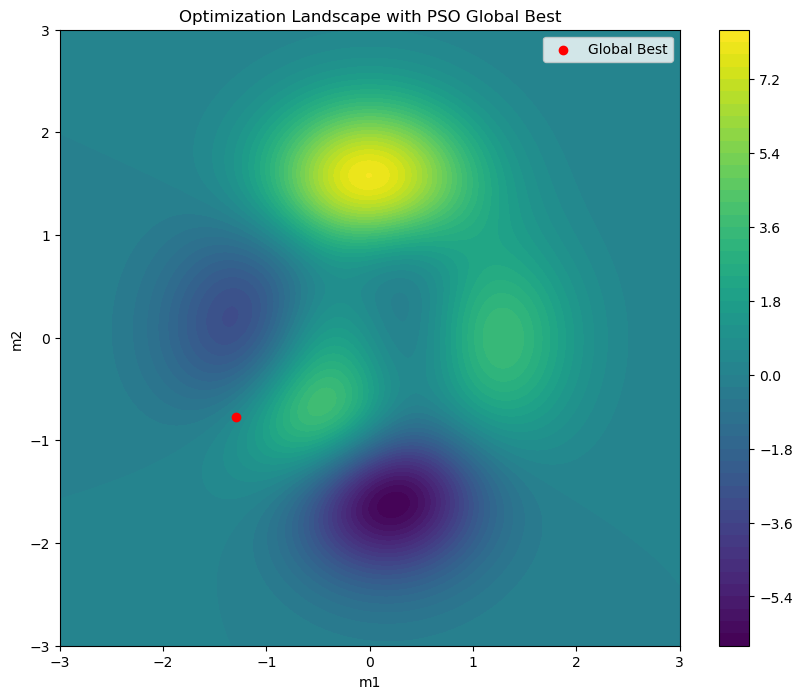

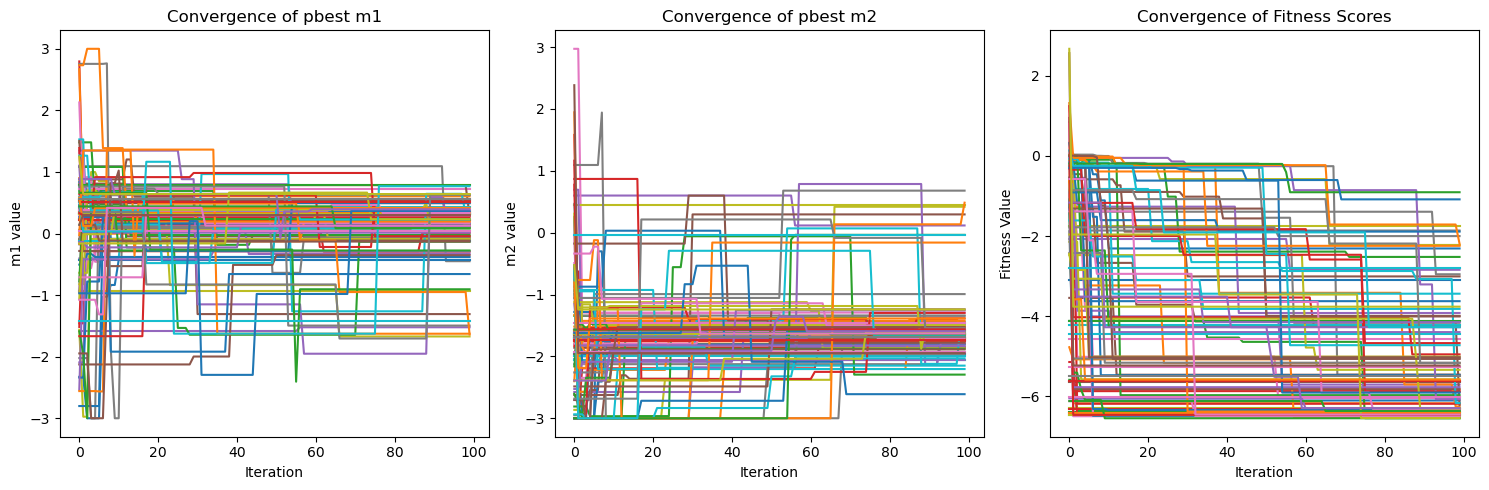

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def fun(m1, m2):
    return (3 * (1 - m1)**2 * np.exp(-(m1**2) - (m2 + 1)**2) -
            10 * (m1 / 5 - m1**3 - m2**5) * np.exp(-m1**2 - m2**2) -
            1/3 * np.exp(-(m1 + 1)**2 - m2**2))

# PSO parameters
num_particles = 100
num_iterations = 100
m1_min, m1_max = -3, 3
m2_min, m2_max = -3, 3
w = 0.5  # Inertia weight
c1, c2 = 2, 2  # Cognitive and social coefficients

# Initialize particle positions and velocities
positions = np.random.uniform([m1_min, m2_min], [m1_max, m2_max], (num_particles, 2))
velocities = np.zeros_like(positions)
personal_best_positions = np.copy(positions)
personal_best_scores = np.array([fun(m1, m2) for m1, m2 in positions])

# Track personal bests over time for visualization
pbest_history_m1 = np.zeros((num_iterations, num_particles))
pbest_history_m2 = np.zeros((num_iterations, num_particles))
pbest_scores_history = np.zeros((num_iterations, num_particles))

# Identify initial global best
global_best_position = personal_best_positions[np.argmin(personal_best_scores)]
global_best_score = np.min(personal_best_scores)

# PSO main loop
for i in range(num_iterations):
    for j in range(num_particles):
        # Update velocities
        r1, r2 = np.random.rand(2)
        velocities[j] = w*velocities[j] + c1*r1*(personal_best_positions[j] - positions[j]) + c2*r2*(global_best_position - positions[j])
        
        # Update positions
        positions[j] += velocities[j]
        positions[j] = np.clip(positions[j], [m1_min, m2_min], [m1_max, m2_max])
        
        # Evaluate fitness
        current_score = fun(positions[j][0], positions[j][1])
        
        # Update personal best
        if current_score < personal_best_scores[j]:
            personal_best_positions[j] = positions[j]
            personal_best_scores[j] = current_score

        # Update global best
        if current_score < global_best_score:
            global_best_position = positions[j]
            global_best_score = current_score

    # Store personal bests for plotting
    pbest_history_m1[i, :] = personal_best_positions[:, 0]
    pbest_history_m2[i, :] = personal_best_positions[:, 1]
    pbest_scores_history[i, :] = personal_best_scores

# Results
print(f'Global best position: {global_best_position}, Global best score: {global_best_score}')

plt.figure(figsize=(10, 8))
contour = plt.contourf(M1, M2, Z, levels=50, cmap='viridis')
plt.colorbar(contour)
plt.scatter(global_best_position[0], global_best_position[1], color='red', label='Global Best')
plt.legend()
plt.title('Optimization Landscape with PSO Global Best')
plt.xlabel('m1')
plt.ylabel('m2')
plt.show()

# Visualization of convergence
plt.figure(figsize=(15, 5))

# Plot convergence of m1 and m2
plt.subplot(1, 3, 1)
plt.plot(pbest_history_m1)
plt.title('Convergence of pbest m1')
plt.xlabel('Iteration')
plt.ylabel('m1 value')

plt.subplot(1, 3, 2)
plt.plot(pbest_history_m2)
plt.title('Convergence of pbest m2')
plt.xlabel('Iteration')
plt.ylabel('m2 value')

# Plot convergence of fitness scores
plt.subplot(1, 3, 3)
plt.plot(pbest_scores_history)
plt.title('Convergence of Fitness Scores')
plt.xlabel('Iteration')
plt.ylabel('Fitness Value')

plt.tight_layout()
plt.show()

